In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [14]:
df=pd.read_excel('NUAR-B_FEBRERO2025_CONVERTIO_1.xlsx',parse_dates=["DATE/TIME(America/Asuncion)"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE/TIME(America/Asuncion)  3793 non-null   object 
 1   Flow Rate Prop. BR           1320 non-null   float64
 2   Flow Rate Prop. CNT          1280 non-null   float64
 3   Flow Rate Prop. STB          1320 non-null   float64
 4   Trip Volume Prop. BR         3782 non-null   float64
 5   Trip Volume Prop. CNT        3783 non-null   float64
 6   Trip Volume Prop. STB        3783 non-null   float64
 7   Flow Rate Gen. 1             1508 non-null   float64
 8   Flow Rate Gen. 2             1508 non-null   float64
 9   Trip Volume Gen. 1           1508 non-null   float64
 10  Trip Volume Gen. 2           1508 non-null   float64
 11  RPM Prop. BR                 1324 non-null   float64
 12  RPM Prop. CNT                1319 non-null   float64
 13  RPM Prop. STB     

In [16]:
# PASANDO A datetime

df['DATE/TIME(America/Asuncion)'] = pd.to_datetime(df['DATE/TIME(America/Asuncion)'], errors='coerce')


# Extraemos los componentes

df['dia'] = df['DATE/TIME(America/Asuncion)'].dt.day
df['mes'] = df['DATE/TIME(America/Asuncion)'].dt.month
df['año'] = df['DATE/TIME(America/Asuncion)'].dt.year
df['hora'] = df['DATE/TIME(America/Asuncion)'].dt.hour
df['minuto'] = df['DATE/TIME(America/Asuncion)'].dt.minute
df['segundo'] = df['DATE/TIME(America/Asuncion)'].dt.second

# Eliminamos DATE/TIME(America/Asuncion

df=df.drop('DATE/TIME(America/Asuncion)',axis=1)

In [17]:
# Separar entradas (X) y salidas (y)
X = df.drop(columns=["Flow Rate Prop. BR", "Flow Rate Prop. STB"])
y = df[["Flow Rate Prop. BR", "Flow Rate Prop. STB"]]

# Imputar valores nulos con la mediana
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
y_imputed = pd.DataFrame(imputer.fit_transform(y), columns=y.columns)

# Dividir en entrenamiento y prueba (mismo índice para ambos targets)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.1, random_state=24)

y_train_BR = y_train["Flow Rate Prop. BR"]
y_test_BR = y_test["Flow Rate Prop. BR"]
y_train_STB = y_train["Flow Rate Prop. STB"]
y_test_STB = y_test["Flow Rate Prop. STB"]

In [24]:
# # Entrenar modelos de regresión lineal
# model_BR = LinearRegression()

# model_BR=DecisionTreeRegressor(max_depth=5, random_state=42)

# model_BR=RandomForestRegressor(n_jobs=-1, random_state=42)

model_BR = GradientBoostingRegressor()

# model_BR = CatBoostRegressor(verbose=0) # tiene get_feature_importance

model_BR.fit(X_train, y_train_BR)

# model_STB = LinearRegression()

# model_STB=DecisionTreeRegressor(max_depth=5, random_state=42)

# model_STB=RandomForestRegressor(n_jobs=-1,random_state=42)

model_STB = GradientBoostingRegressor()

# model_STB = CatBoostRegressor(verbose=0) 

model_STB.fit(X_train, y_train_STB)

# Predicciones en el conjunto de prueba
y_pred_BR = model_BR.predict(X_test)
y_pred_STB = model_STB.predict(X_test)

# Cálculo de métricas para Flow Rate Prop. BR
mae_BR = mean_absolute_error(y_test_BR, y_pred_BR)
mse_BR = mean_squared_error(y_test_BR, y_pred_BR)
rmse_BR = np.sqrt(mse_BR)
r2_BR = r2_score(y_test_BR, y_pred_BR)

# Cálculo de métricas para Flow Rate Prop. STB
mae_STB = mean_absolute_error(y_test_STB, y_pred_STB)
mse_STB = mean_squared_error(y_test_STB, y_pred_STB)
rmse_STB = np.sqrt(mse_STB)
r2_STB = r2_score(y_test_STB, y_pred_STB)

# Mostrar resultados
print("**Errores para Flow Rate Prop BR:**")
print(f"MAE  Cuánto se equivoca el modelo en promedio?: {mae_BR:.2f}")
print(f"MSE Penaliza más los errores grandes (porque los eleva al cuadrado) : {mse_BR:.2f}")
print(f"RMSE Tiene las mismas unidades que la variable a predecir: {rmse_BR:.2f}")
print(f"R² Valor entre 0 y 1 (o incluso negativo). Cuanto más cerca de 1, mejor: {r2_BR:.4f}\n")

print("**Errores para Flow Rate Prop. STB:**")
print(f"MAE  Cuánto se equivoca el modelo en promedio?: {mae_STB:.2f}")
print(f"MSE Penaliza más los errores grandes (porque los eleva al cuadrado).: {mse_STB:.2f}")
print(f"RMSE Tiene las mismas unidades que la variable a predecir: {rmse_STB:.2f}")
print(f"R²  Valor entre 0 y 1 (o incluso negativo). Cuanto más cerca de 1, mejor: {r2_STB:.4f}")


**Errores para Flow Rate Prop BR:**
MAE  Cuánto se equivoca el modelo en promedio?: 0.49
MSE Penaliza más los errores grandes (porque los eleva al cuadrado) : 6.64
RMSE Tiene las mismas unidades que la variable a predecir: 2.58
R² Valor entre 0 y 1 (o incluso negativo). Cuanto más cerca de 1, mejor: 0.9977

**Errores para Flow Rate Prop. STB:**
MAE  Cuánto se equivoca el modelo en promedio?: 0.79
MSE Penaliza más los errores grandes (porque los eleva al cuadrado).: 38.19
RMSE Tiene las mismas unidades que la variable a predecir: 6.18
R²  Valor entre 0 y 1 (o incluso negativo). Cuanto más cerca de 1, mejor: 0.9849


In [25]:
# VER SOLO LOS 10 MAS IMPORTANTES SEGUN CATBOOS

# Obtener las importancias y nombres
feature_importance = model_BR.get_feature_importance()
feature_names = X.columns

# Crear DataFrame ordenado
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Tomar las 10 principales
top10 = importance_df.head(10)

# Crear una copia explícita de top10 para evitar problemas
top10_copy = top10.copy()

# Agregar columna de porcentaje
total_importance = top10_copy['Importance'].sum()
top10_copy['Percentage'] = (top10_copy['Importance'] / total_importance) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Percentage', y='Feature', data=top10_copy, hue='Feature', palette='viridis', legend=False)
plt.title('Top 10 Feature Importances (en %)')
plt.xlabel('Importancia (%)')
plt.ylabel('Variable')

# Agregar texto con el valor porcentual
for i, (pct, feature) in enumerate(zip(top10_copy['Percentage'], top10_copy['Feature'])):
    ax.text(pct + 0.1, i, f"{pct:.2f}%", va='center')

plt.tight_layout()
plt.show()


AttributeError: 'GradientBoostingRegressor' object has no attribute 'get_feature_importance'

In [26]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    # Convertir a DataFrame y ordenar
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Normalizar a porcentaje
    total = df["feature_importances"][:n].sum()
    df["percentage"] = (df["feature_importances"] / total) * 100

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(df["features"][:n], df["percentage"][:n], color='skyblue')
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance (%)")
    ax.set_title(f"Top {n} Feature Importances")
    ax.invert_yaxis()

    # Agregar porcentaje sobre las barras
    for i, (value, feature) in enumerate(zip(df["percentage"][:n], df["features"][:n])):
        ax.text(value + 0.5, i, f"{value:.2f}%", va='center')

    plt.tight_layout()
    plt.show()

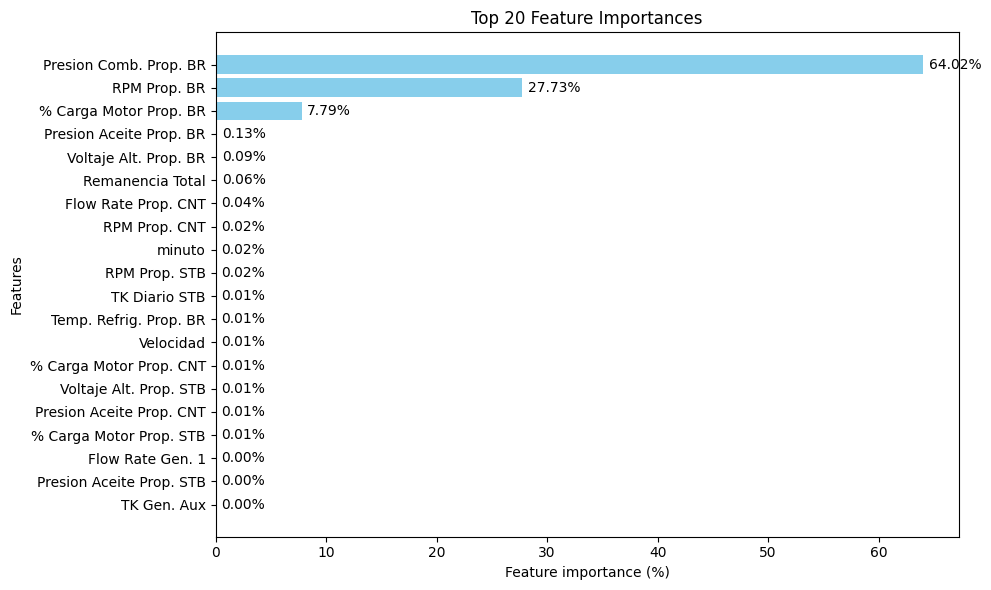

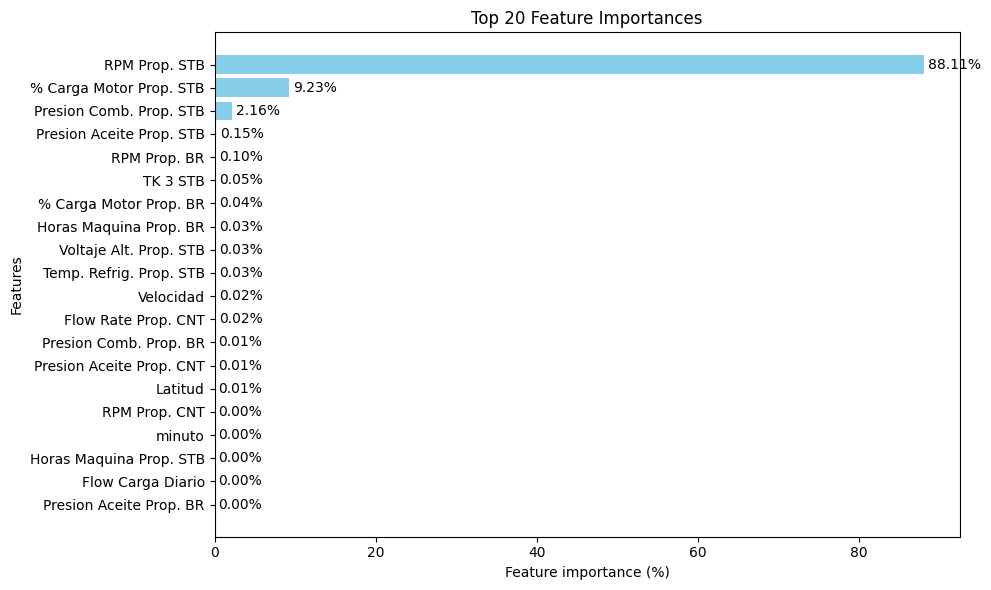

In [27]:
plot_features(feature_names, model_BR.feature_importances_)
plot_features(feature_names, model_STB.feature_importances_)

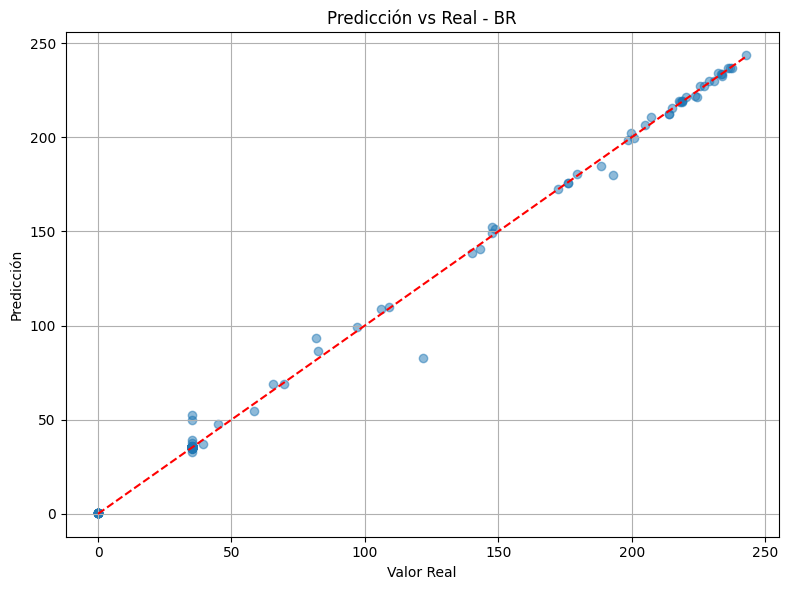

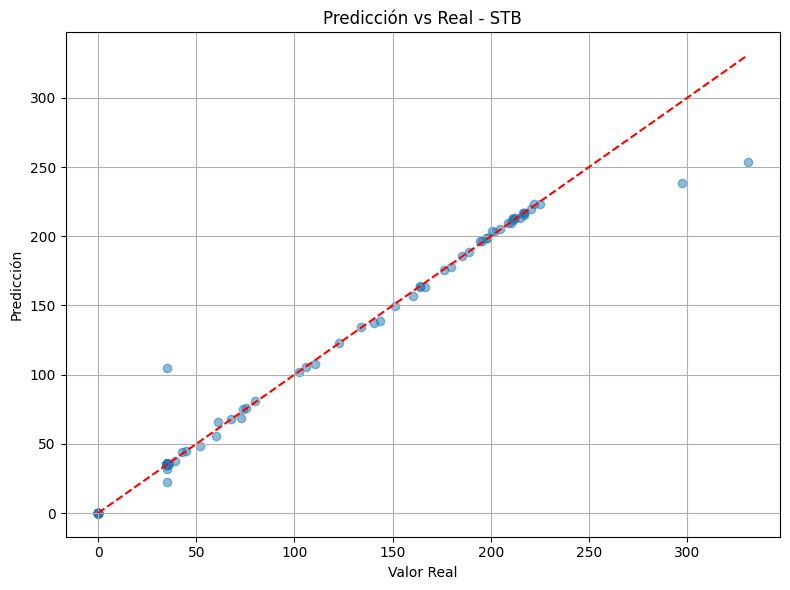

In [28]:
# Gráfico de predicciones vs reales
def graficar_resultados(y_real, y_pred, titulo):
    plt.figure(figsize=(8,6))
    plt.scatter(y_real, y_pred, alpha=0.5)
    plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--')
    plt.xlabel("Valor Real")
    plt.ylabel("Predicción")
    plt.title(titulo)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

graficar_resultados(y_test_BR, y_pred_BR, "Predicción vs Real - BR")
graficar_resultados(y_test_STB, y_pred_STB, "Predicción vs Real - STB")


In [30]:
# Guardar los modelos CATBOOSTS en archivos .cbm
# model_BR.save_model("modelo_reentrenado_BR.cbm")
# model_STB.save_model("modelo_reentrenado_STB.cbm")

model_BR.save("modelo_reentrenado_BR.cbm")
model_STB.save("modelo_reentrenado_STB.cbm")

AttributeError: 'GradientBoostingRegressor' object has no attribute 'save'